# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [90]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [91]:
cities[0]
city

'qaqortoq'

In [92]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
response = requests.get(city_url)
city_weather = response.json()
city_weather 


{'coord': {'lon': -46.0333, 'lat': 60.7167},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 38.12,
  'feels_like': 26.42,
  'temp_min': 38.12,
  'temp_max': 38.12,
  'pressure': 986,
  'humidity': 77,
  'sea_level': 986,
  'grnd_level': 986},
 'visibility': 10000,
 'wind': {'speed': 27.25, 'deg': 93, 'gust': 45.63},
 'clouds': {'all': 100},
 'dt': 1700447259,
 'sys': {'country': 'GL', 'sunrise': 1700479128, 'sunset': 1700504454},
 'timezone': -7200,
 'id': 3420846,
 'name': 'Qaqortoq',
 'cod': 200}

In [93]:
city_latitude = city_weather["coord"]["lat"]
#city_lat = city_weather.get("coord", {}).get("lat", None)
#city_lng = city_weather.get("coord", {}).get("lon", None)
#city_max_temp = city_weather.get("main", {}).get("temp_max", None)
#city_humidity = city_weather.get("main", {}).get("humidity", None)
#city_clouds = city_weather.get("clouds", {}).get("all", None)
#city_wind = city_weather.get("wind", {}).get("speed", None)
#city_country = city_weather.get("sys", {}).get("country", None)
#city_date = city_weather.get("dt")
city_longitude = city_weather["coord"]["lon"]
city_max_temperature = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

In [94]:
city_weather.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [95]:
city_weather["coord"]

{'lon': -46.0333, 'lat': 60.7167}

In [96]:
{"City": city, 
  "Lat": city_latitude, 
  "Lng": city_longitude, 
  "Max Temp": city_max_temperature,
  "Humidity": city_humidity,
  "Cloudiness": city_clouds,
  "Wind Speed": city_wind,
  "Country": city_country,
  "Date": city_date}

{'City': 'qaqortoq',
 'Lat': 60.7167,
 'Lng': -46.0333,
 'Max Temp': 38.12,
 'Humidity': 77,
 'Cloudiness': 100,
 'Wind Speed': 27.25,
 'Country': 'GL',
 'Date': 1700447259}

In [97]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:500]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_latitude = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitude, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | chail
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | pervomaysk
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | dera bugti
Processing Record 9 of Set 1 | skovorodino
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | taiohae
'coord'
City taiohae not found. Skipping...
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | kampene
Processing Record 15 of Set 1 | marquette
Processing Record 16 of Set 1 | tadine
Processing Record 17 of Set 1 | dunedin
Processing Record 18 of Set 1 | bubaque
Processing Record 19 of Set 1 | pathein
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of

Processing Record 37 of Set 4 | tamanrasset
Processing Record 38 of Set 4 | kodiak
Processing Record 39 of Set 4 | reitz
Processing Record 40 of Set 4 | buinsk
Processing Record 41 of Set 4 | zangilan
Processing Record 42 of Set 4 | marsaskala
'coord'
City marsaskala not found. Skipping...
Processing Record 43 of Set 4 | kimbe
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | solvang
Processing Record 46 of Set 4 | marblehead
Processing Record 47 of Set 4 | kattivakkam
Processing Record 48 of Set 4 | kununurra
Processing Record 49 of Set 4 | anna regina
Processing Record 0 of Set 5 | ust-nera
Processing Record 1 of Set 5 | hawaiian paradise park
Processing Record 2 of Set 5 | shihezi
Processing Record 3 of Set 5 | villanueva
Processing Record 4 of Set 5 | chinchani
Processing Record 5 of Set 5 | san agustin de valle fertil
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Set 5 | geraldton
Processing Record 8 of Set 5 | akureyri
Processing Re

Processing Record 19 of Set 8 | grafton
Processing Record 20 of Set 8 | ibotirama
Processing Record 21 of Set 8 | jaruco
Processing Record 22 of Set 8 | zhuanghe
Processing Record 23 of Set 8 | bandar labuan
Processing Record 24 of Set 8 | onguday
Processing Record 25 of Set 8 | manicore
Processing Record 26 of Set 8 | eseka
Processing Record 27 of Set 8 | ambovombe
Processing Record 28 of Set 8 | catamayo
Processing Record 29 of Set 8 | kokkola
Processing Record 30 of Set 8 | sandy point town
Processing Record 31 of Set 8 | mukah
'coord'
City mukah not found. Skipping...
Processing Record 32 of Set 8 | bhimunipatnam
Processing Record 33 of Set 8 | weno
Processing Record 34 of Set 8 | mabaruma
Processing Record 35 of Set 8 | mossel bay
Processing Record 36 of Set 8 | ji parana
'coord'
City ji parana not found. Skipping...
Processing Record 37 of Set 8 | dudinka
Processing Record 38 of Set 8 | greenland
Processing Record 39 of Set 8 | port augusta
Processing Record 40 of Set 8 | olinda


In [98]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          469
Lat           469
Lng           469
Max Temp      469
Humidity      469
Cloudiness    469
Wind Speed    469
Country       469
Date          469
dtype: int64

In [99]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.5649,-52.7093,42.98,93,100,6.91,CA,1700447128
1,adamstown,-25.0660,-130.1015,72.09,89,100,18.92,PN,1700447270
2,chail,25.4333,81.6333,69.48,66,0,2.10,IN,1700447271
3,port-aux-francais,-49.3500,70.2167,41.29,84,83,46.30,TF,1700447272
4,pervomaysk,48.0443,30.8507,32.65,79,100,11.27,UA,1700447272


In [100]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data", index_label="City")

In [101]:
# Read saved data
city_data_df = pd.read_csv("output_data", index_col="City")

# Display sample data
city_data_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
0,st. john's,47.5649,-52.7093,42.98,93,100,6.91,CA,1700447128
1,adamstown,-25.0660,-130.1015,72.09,89,100,18.92,PN,1700447270
2,chail,25.4333,81.6333,69.48,66,0,2.10,IN,1700447271
3,port-aux-francais,-49.3500,70.2167,41.29,84,83,46.30,TF,1700447272
4,pervomaysk,48.0443,30.8507,32.65,79,100,11.27,UA,1700447272


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

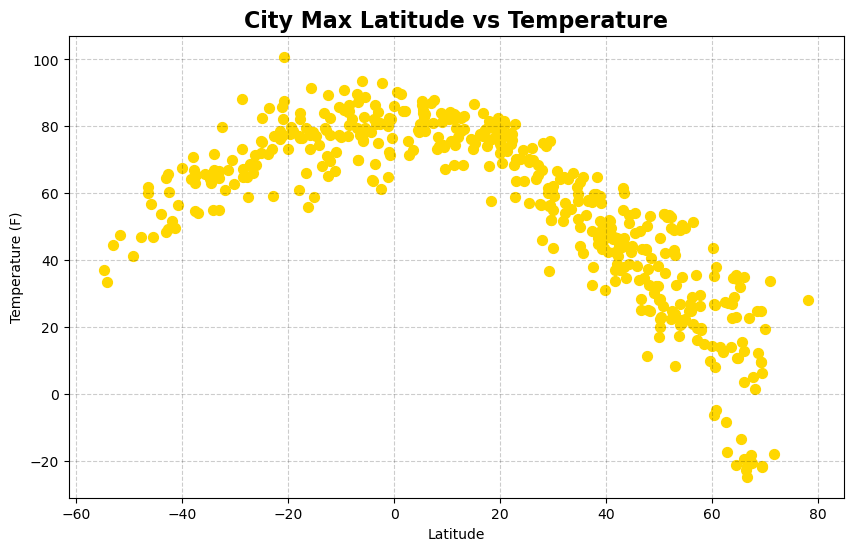

In [102]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="gold", s=50)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Max Latitude vs Temperature", fontweight="bold", fontsize=16)
plt.grid(color="black", alpha=0.2, linestyle="--")

# Save the figure
plt.savefig("output_data_1")

# Show plot
plt.show()

#### Latitude Vs. Humidity

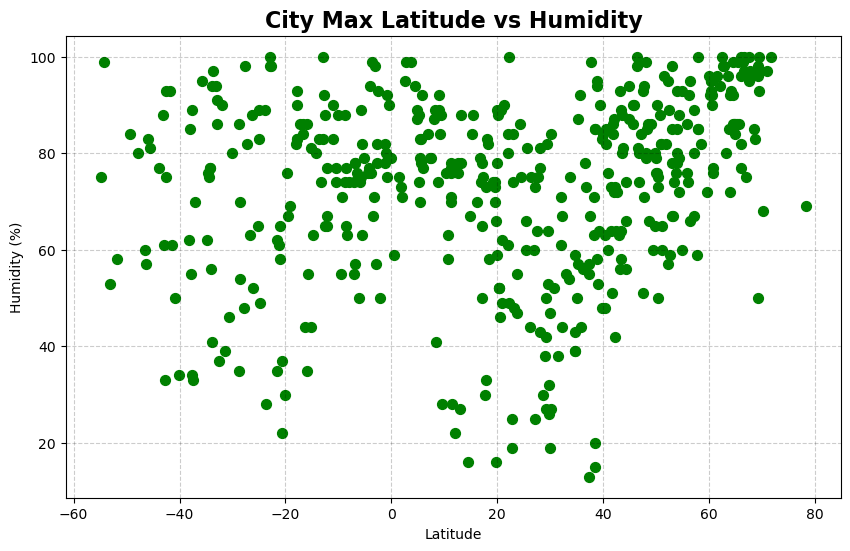

In [103]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Humidity"], color="green", s=50)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs Humidity", fontweight="bold", fontsize=16)
plt.grid(color="black", alpha=0.2, linestyle="--")


# Save the figure
plt.savefig("output_data_2")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [104]:
city_data_df

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
0,st. john's,47.5649,-52.7093,42.98,93,100,6.91,CA,1700447128
1,adamstown,-25.0660,-130.1015,72.09,89,100,18.92,PN,1700447270
2,chail,25.4333,81.6333,69.48,66,0,2.10,IN,1700447271
3,port-aux-francais,-49.3500,70.2167,41.29,84,83,46.30,TF,1700447272
4,pervomaysk,48.0443,30.8507,32.65,79,100,11.27,UA,1700447272
...,...,...,...,...,...,...,...,...,...
464,gorom-gorom,14.4439,-0.2361,76.26,16,87,9.55,BF,1700447640
465,mankono,8.0586,-6.1897,73.20,87,49,3.74,CI,1700447640
466,al jahra',29.3375,47.6581,75.61,82,46,20.69,KW,1700447641


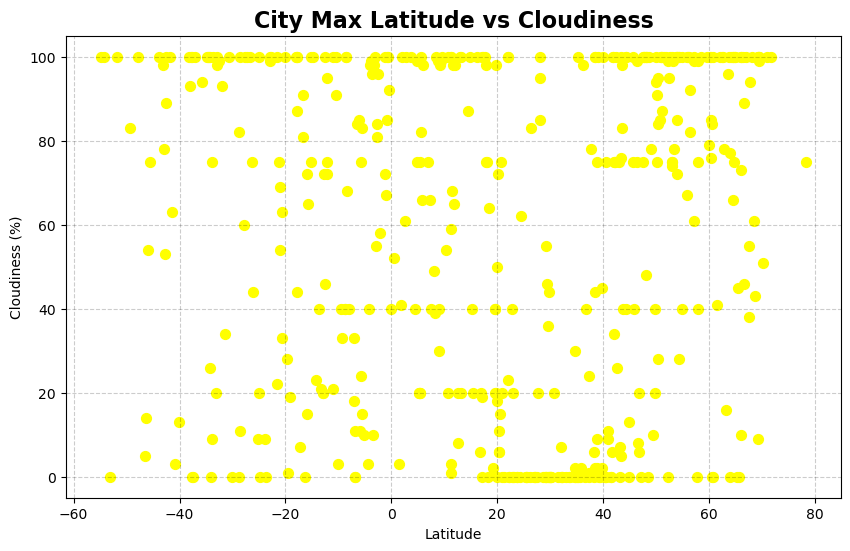

In [105]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"], color="yellow", s=50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="black", alpha=0.2, linestyle="--")


# Save the figure
plt.savefig("output_data_3")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [106]:
city_data_df

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
0,st. john's,47.5649,-52.7093,42.98,93,100,6.91,CA,1700447128
1,adamstown,-25.0660,-130.1015,72.09,89,100,18.92,PN,1700447270
2,chail,25.4333,81.6333,69.48,66,0,2.10,IN,1700447271
3,port-aux-francais,-49.3500,70.2167,41.29,84,83,46.30,TF,1700447272
4,pervomaysk,48.0443,30.8507,32.65,79,100,11.27,UA,1700447272
...,...,...,...,...,...,...,...,...,...
464,gorom-gorom,14.4439,-0.2361,76.26,16,87,9.55,BF,1700447640
465,mankono,8.0586,-6.1897,73.20,87,49,3.74,CI,1700447640
466,al jahra',29.3375,47.6581,75.61,82,46,20.69,KW,1700447641


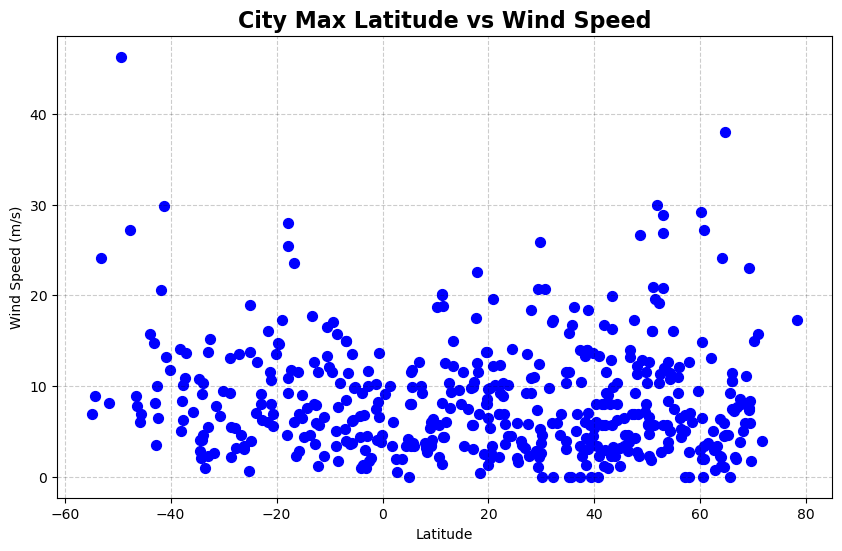

In [107]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="blue", s=50)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="black", alpha=0.2, linestyle="--")


# Save the figure
plt.savefig("output_data_4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [108]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def makeLinearRegressionPlot(x_values, y_values, y_col, hemi, annot_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, annot_loc, fontsize = 15, color = "blue")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_col}')
    plt.title(f'Latitude vs {y_col} ({hemi} Hemi)')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [109]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
0,st. john's,47.5649,-52.7093,42.98,93,100,6.91,CA,1700447128
2,chail,25.4333,81.6333,69.48,66,0,2.10,IN,1700447271
4,pervomaysk,48.0443,30.8507,32.65,79,100,11.27,UA,1700447272
6,hamilton,39.1834,-84.5333,49.21,64,0,5.75,US,1700447108
7,dera bugti,29.0307,69.1510,60.21,38,0,2.89,PK,1700447274


In [110]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
1,adamstown,-25.0660,-130.1015,72.09,89,100,18.92,PN,1700447270
3,port-aux-francais,-49.3500,70.2167,41.29,84,83,46.30,TF,1700447272
5,blackmans bay,-43.0167,147.3167,64.53,61,78,8.16,AU,1700447273
12,kampene,-3.6000,26.6667,68.67,99,96,1.28,CD,1700447277
14,tadine,-21.5500,167.8833,76.14,62,22,16.04,NC,1700447279


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8043190257817847


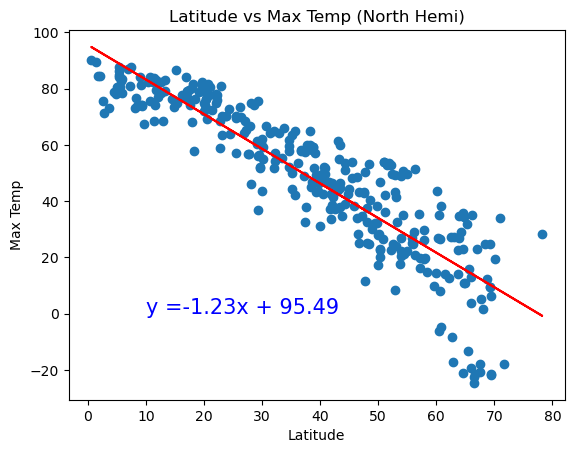

In [114]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values, y_values, "Max Temp", "North", (10, 0))

The r-squared is: 0.5168014455514482


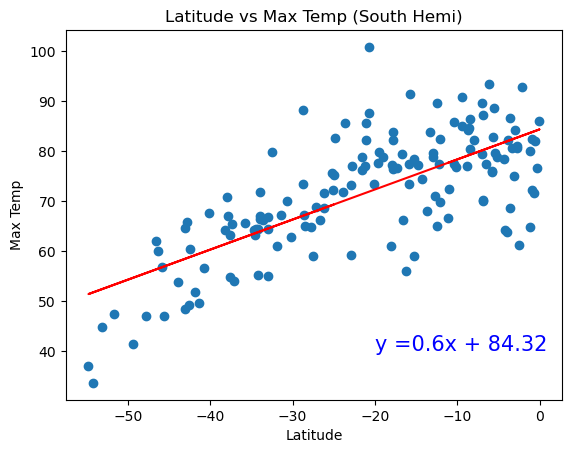

In [113]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values, y_values, "Max Temp", "South", (-20, 40))

***There is a high negative relation between northern hemisphere and temperature. while there is a moderate positive relation between southern hemisphere and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.10744435129553005


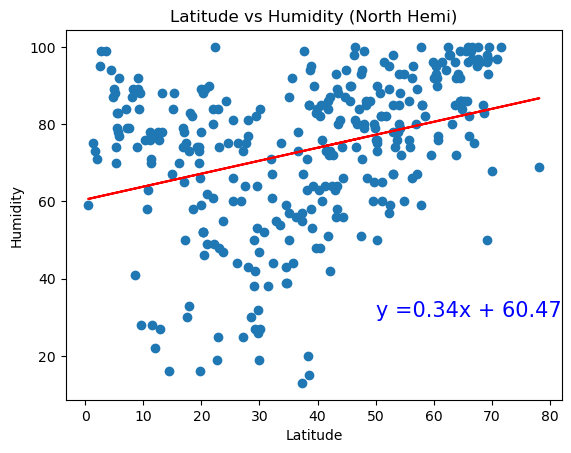

In [119]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidity", "North", (50, 30))

The r-squared is: 0.021837875555541293


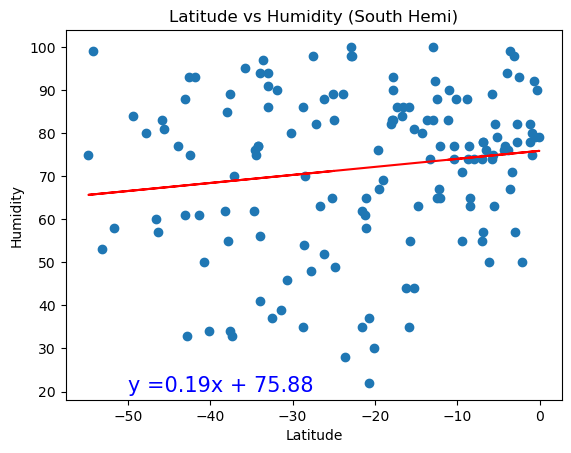

In [118]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidity", "South", (-50, 20))

***There is a no relationship between humidity and both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06151526658874813


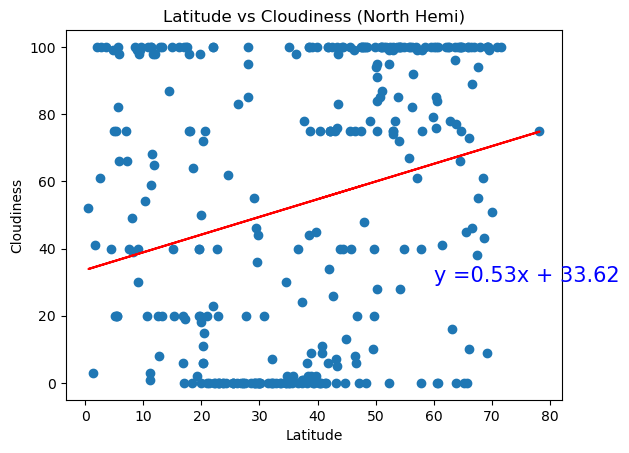

In [122]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "North", (60, 30))

The r-squared is: 0.005447128300760604


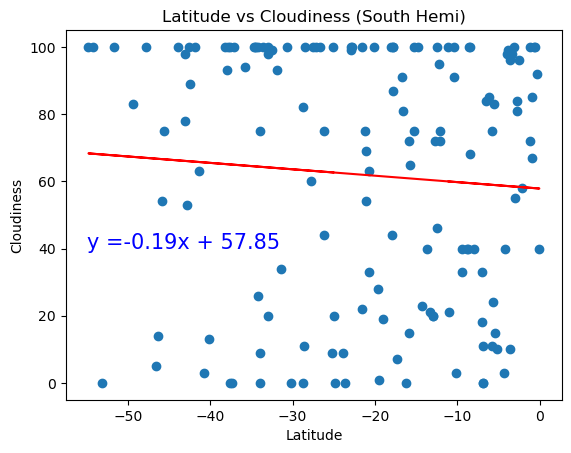

In [125]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "South", (-55, 40))

***There is a no relationship between cloudiness and both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0056228510309526405


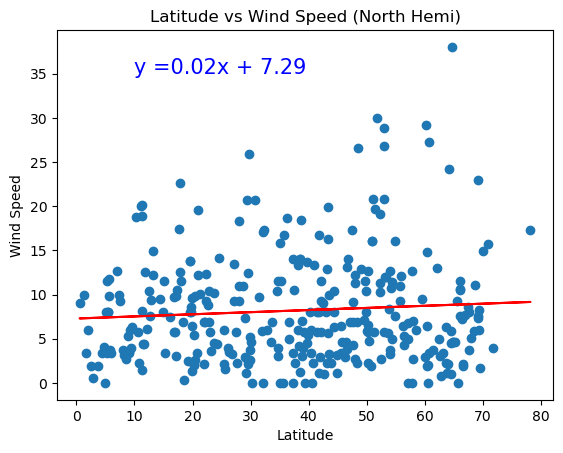

In [127]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "North", (10, 35))

The r-squared is: 0.05738087419496142


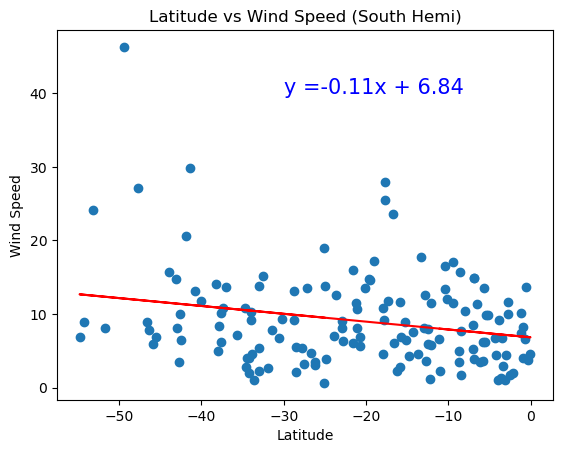

In [129]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "South", (-30, 40))

**Looking at r-squared there is a no relationship between cloudiness and both hemispheres.